---

# Real Dataset

---

# Import Libraries and Dataset:

### https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [1]:
# Import library
# Mengimpor pustaka dan dataset yang akan digunakan

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

# Menyuppress peringatan
import warnings
warnings.simplefilter("ignore")

#  Data Preparation

In [2]:
# Membaca dataset Heart Disease dari file CSV
df = pd.read_csv(r"heart_2020_cleaned.csv")

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
# Mengubah variabel kategorikal menjadi nilai numerik

columns_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

df[columns_to_encode] = df[columns_to_encode].replace({'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})

In [4]:
df['GenHealth'] = df['GenHealth'].map({'Excellent': 4, 'Very good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})

In [5]:
df['AverageAgeCategory'] = df['AgeCategory']

In [6]:
df['AverageAgeCategory'] = df['AverageAgeCategory'].map({'18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42,
                                           '45-49': 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67,
                                           '70-74': 72, '75-79': 77, '80 or older': 85})

In [7]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

In [8]:
df.drop(['AgeCategory'], axis=1, inplace=True)

In [9]:
df.rename(columns={'AverageAgeCategory': 'Age'}, inplace=True)

In [10]:
le = LabelEncoder()
df['Race'] = le.fit_transform(df['Race'])

In [11]:
print(df.dtypes)

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
Race                  int32
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
Age                   int64
dtype: object


In [12]:
# Memeriksa nilai yang hilang atau missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
Age                 0
dtype: int64


In [13]:
df2 = pd.read_csv(r"heart.csv")
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
df2.rename(columns={'target': 'HeartDisease'}, inplace=True)
df2.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

In [15]:
df2.isnull().sum()

Age             0
Sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
HeartDisease    0
dtype: int64

In [16]:
df2.drop(columns=['thal'], inplace=True)

In [17]:
df = pd.merge(df, df2, on=['Age', 'Sex', 'HeartDisease'], how='inner')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,...,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,0,16.60,1,0,0,3.0,30.0,0,0,5,...,0,140,241,0,1,123,1,0.2,1,0
1,0,16.60,1,0,0,3.0,30.0,0,0,5,...,1,130,236,0,0,174,0,0.0,1,1
2,0,16.60,1,0,0,3.0,30.0,0,0,5,...,1,130,236,0,0,174,0,0.0,1,1
3,0,16.60,1,0,0,3.0,30.0,0,0,5,...,1,130,236,0,0,174,0,0.0,1,1
4,0,16.60,1,0,0,3.0,30.0,0,0,5,...,0,140,241,0,1,123,1,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548178,1,27.41,1,0,0,7.0,0.0,1,1,3,...,2,130,231,0,1,146,0,1.8,1,3
1548179,1,27.41,1,0,0,7.0,0.0,1,1,3,...,1,128,208,1,0,140,0,0.0,2,0
1548180,1,27.41,1,0,0,7.0,0.0,1,1,3,...,1,128,208,1,0,140,0,0.0,2,0
1548181,1,27.41,1,0,0,7.0,0.0,1,1,3,...,2,130,231,0,1,146,0,1.8,1,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548183 entries, 0 to 1548182
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HeartDisease      1548183 non-null  int64  
 1   BMI               1548183 non-null  float64
 2   Smoking           1548183 non-null  int64  
 3   AlcoholDrinking   1548183 non-null  int64  
 4   Stroke            1548183 non-null  int64  
 5   PhysicalHealth    1548183 non-null  float64
 6   MentalHealth      1548183 non-null  float64
 7   DiffWalking       1548183 non-null  int64  
 8   Sex               1548183 non-null  int64  
 9   Race              1548183 non-null  int32  
 10  Diabetic          1548183 non-null  int64  
 11  PhysicalActivity  1548183 non-null  int64  
 12  GenHealth         1548183 non-null  int64  
 13  SleepTime         1548183 non-null  float64
 14  Asthma            1548183 non-null  int64  
 15  KidneyDisease     1548183 non-null  int64  
 16  

In [19]:
pd.set_option('display.max_columns', None)  
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0
1,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1
2,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1
3,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1
4,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548178,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,2,130,231,0,1,146,0,1.8,1,3
1548179,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,1,128,208,1,0,140,0,0.0,2,0
1548180,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,1,128,208,1,0,140,0,0.0,2,0
1548181,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,2,130,231,0,1,146,0,1.8,1,3


# Data Preprocessing

In [20]:
# Membuat kolom baru 'age_group' berdasarkan 'AverageAgeCategory'

min_age = df['Age'].min()
median_age = df['Age'].median()
max_age = df['Age'].max()

# Display hasil
print("Minimum age:", min_age)
print("Median age:", median_age)
print("Maximum age:", max_age)

Minimum age: 37
Median age: 57.0
Maximum age: 77


In [21]:
# Buat kolom baru 'age_group' berdasarkan 'AverageAgeCategory'
df['age_group'] = pd.cut(df['Age'], bins=[21, 40, 61, float('inf')], labels=['21-39', '40-60', '61+'], right=False)

# Display dataframe yang sudah di update
print(df)

         HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  \
0                   0  16.60        1                0       0   
1                   0  16.60        1                0       0   
2                   0  16.60        1                0       0   
3                   0  16.60        1                0       0   
4                   0  16.60        1                0       0   
...               ...    ...      ...              ...     ...   
1548178             1  27.41        1                0       0   
1548179             1  27.41        1                0       0   
1548180             1  27.41        1                0       0   
1548181             1  27.41        1                0       0   
1548182             1  27.41        1                0       0   

         PhysicalHealth  MentalHealth  DiffWalking  Sex  Race  Diabetic  \
0                   3.0          30.0            0    0     5         1   
1                   3.0          30.0            0    0  

In [22]:
# Hitung jumlah individu dalam setiap kelompok usia
age_group_counts = df['age_group'].value_counts()

# Menampilkan hitungan
print("Counts of individuals in each age group:")
print(age_group_counts)

Counts of individuals in each age group:
age_group
40-60    820237
61+      727058
21-39       888
Name: count, dtype: int64


In [23]:
# Membuat DataFrame baru untuk setiap kelompok usia
young = df[df['age_group'] == '21-39']
middle = df[df['age_group'] == '40-60']
old = df[df['age_group'] == '61+']

# Menampilkan beberapa baris pertama dari setiap DataFrame baru
print("Data for age group 21-39:")
young.head()


Data for age group 21-39:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
4998,1,46.03,0,0,0,0.0,0.0,0,1,2,1,1,0,7.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
4999,1,46.03,0,0,0,0.0,0.0,0,1,2,1,1,0,7.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
5000,1,46.03,0,0,0,0.0,0.0,0,1,2,1,1,0,7.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
6527,1,45.33,0,0,0,6.0,10.0,0,1,5,0,1,1,6.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
6528,1,45.33,0,0,0,6.0,10.0,0,1,5,0,1,1,6.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39


In [24]:
print("\nData for age group 50-60:")
middle.head()


Data for age group 50-60:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
0,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0,40-60
1,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1,40-60
2,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1,40-60
3,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1,40-60
4,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0,40-60


In [25]:
print("\nData for age group 64+:")
old.head()


Data for age group 64+:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
6,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,2,152,212,0,0,150,0,0.8,1,0,61+
7,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,0,100,299,0,0,125,1,0.9,1,2,61+
8,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,0,160,286,0,0,108,1,1.5,1,3,61+
9,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,0,100,299,0,0,125,1,0.9,1,2,61+
10,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,2,152,212,0,0,150,0,0.8,1,0,61+


In [26]:
# Menghapus baris dengan nilai yang hilang

df.dropna(inplace=True)

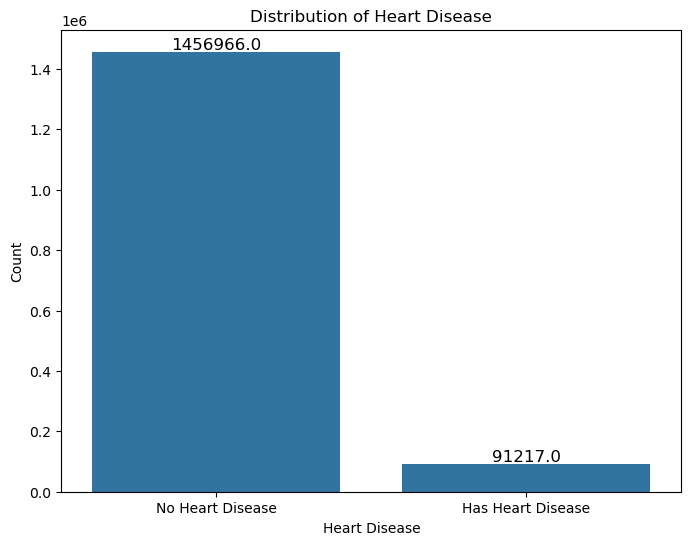

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(['No Heart Disease', 'Has Heart Disease'])

plt.show()

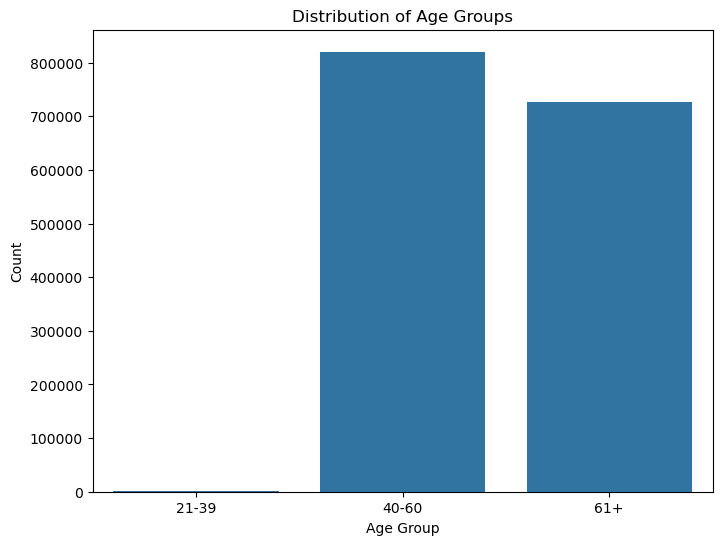

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Data Processing

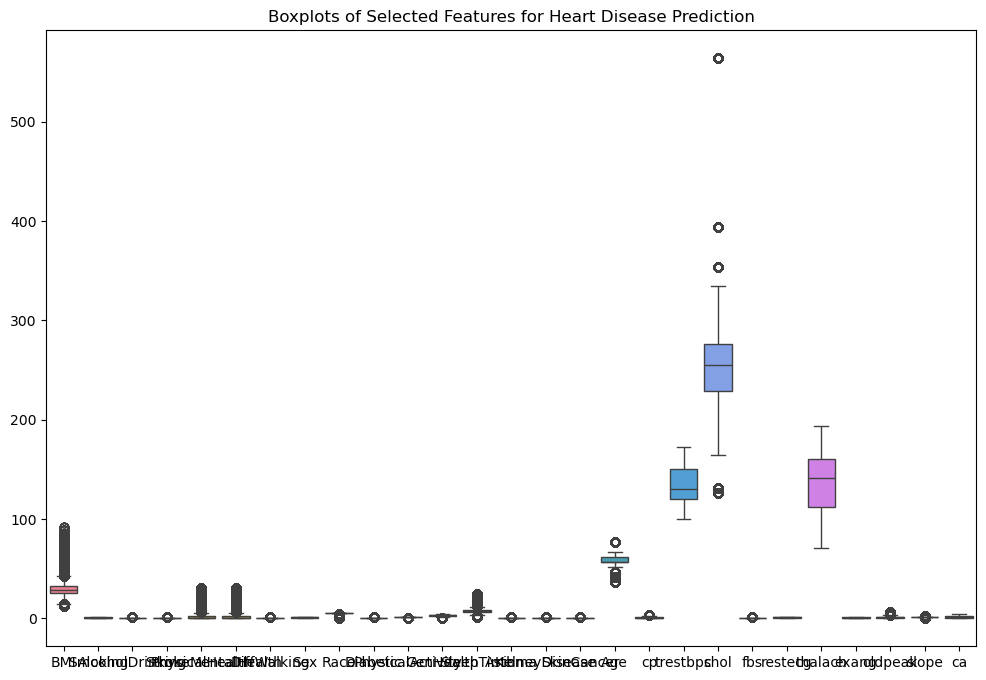

In [29]:
# Kolom yang berkaitan dengan kesehatan dan gaya hidup
columns_of_interest = [
    'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
    'MentalHealth', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity',
    'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Age',
    'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca'
]

# Membuat boxplot untuk kolom yang dipilih
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplots of Selected Features for Heart Disease Prediction')
plt.show()

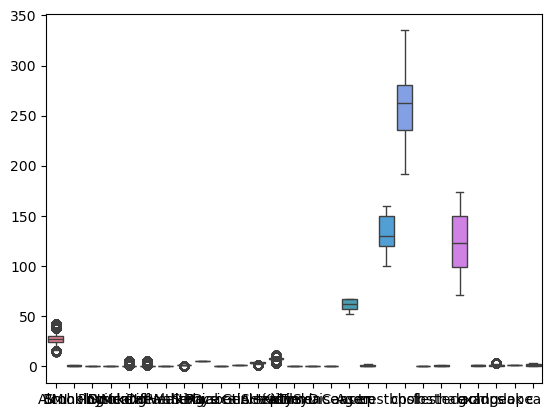

In [30]:
# Menghitung IQR dan menghapus outlier dari dataset

Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5

outlier_mask = ~((df[columns_of_interest] < (Q1 - outlier_threshold * IQR)) | (df[columns_of_interest] > (Q3 + outlier_threshold * IQR))).any(axis=1)

df_no_outliers = df[outlier_mask]

sns.boxplot(data=df_no_outliers[columns_of_interest])
plt.show()

In [31]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df_no_outliers['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
0    247062
1      2523
Name: count, dtype: int64


## Pengambilan data dari atas

In [32]:
desired_counts = {'1': 2000, '0': 2000}

# Inisialisasi DataFrame kosong
df_measured = pd.DataFrame()

# Loop through each class and select the desired count from the top
for class_value, count in desired_counts.items():
    # Filter the original DataFrame for the specific class
    class_df = df_no_outliers[df_no_outliers['HeartDisease'] == int(class_value)]
    
    # Take the top 'count' samples
    sampled_data = class_df.head(count)
    
    # Menambahkan data sampel ke DataFrame baru
    df_measured = pd.concat([df_measured, sampled_data])

# Mengacak DataFrame untuk mencampur kelas
df_measured = df_measured.sample(frac=1, random_state=42).reset_index(drop=True)

In [33]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df_measured['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
1    2000
0    2000
Name: count, dtype: int64


In [34]:
# Health-related Features
health_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Lifestyle and Behavior
lifestyle_features = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']

# Medical Tests and Indicators
medical_tests = ['Stroke', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# Demographic and Personal Information
demographic_info = ['Sex', 'Race', 'Age']

# Functional Abilities
functional_abilities = ['DiffWalking']


In [35]:
feature_cols = demographic_info + lifestyle_features + medical_tests

In [36]:
# Membagi dataset menjadi data latih dan data uji

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_measured['age_group_encoded'] = encoder.fit_transform(df_measured['age_group'])

X = df_measured[feature_cols]
y = df_measured['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL EVALUATION

## Logistic Regression

### Table Sampling

In [37]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

     Train Size     Test Size Total Samples  Accuracy
0  3200 (80.0%)   800 (20.0%)          4000  0.971250
1  2800 (70.0%)  1200 (30.0%)          4000  0.966667
2  2400 (60.0%)  1600 (40.0%)          4000  0.968125


### Model

In [38]:
noise_level = 0.25

In [39]:
num_samples = len(y_train)
num_samples_to_flip = int(noise_level * num_samples)
flip_indices = np.random.choice(num_samples, num_samples_to_flip, replace=False)
flip_indices = np.where(flip_indices < len(y_train), flip_indices, flip_indices % len(y_train))

In [40]:
y_train_noisy = y_train.copy()
y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 2, 10, 100],
    'penalty': ['l1', 'l2']
}

In [43]:
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(X_train, y_train_noisy)

LogisticRegression(max_iter=1000)

In [44]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=50)

In [45]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [46]:
grid_search_logistic = GridSearchCV(modelLogistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 2, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [47]:
best_model = grid_search_logistic.best_estimator_

In [48]:
y_pred = best_model.predict(X_test)

In [49]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Akurasi model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriks konfusi yang menunjukkan hasil prediksi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       813
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion Matrix:
 [[813   0]
 [  0 787]]


In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                            
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0
R-squared: 1.0
Mean Absolute Error: 0.0


In [51]:
from sklearn.metrics import roc_auc_score

# Memprediksi probabilitas untuk kelas positif pada training set
y_train_prob = modelLogistic.predict_proba(X_train)[:, 1]

# Memprediksi probabilitas untuk kelas positif pada testing set
y_test_prob = modelLogistic.predict_proba(X_test)[:, 1]

# Hitung AUC untuk set pelatihan
auc_train = roc_auc_score(y_train, y_train_prob)

# Hitung AUC untuk set pengujian
auc_test = roc_auc_score(y_test, y_test_prob)

# Mencetak skor AUC
print("AUC for Training Set:", auc_train)
print("AUC for Testing Set:", auc_test)


AUC for Training Set: 1.0
AUC for Testing Set: 1.0


## Lasso Regression

### Table Sampling

In [52]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Lasso(max_iter=1000)  # Using Lasso Regression
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    # Convert predicted values to binary predictions (0 or 1)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

     Train Size     Test Size Total Samples  Accuracy
0  3200 (80.0%)   800 (20.0%)          4000  0.852500
1  2800 (70.0%)  1200 (30.0%)          4000  0.894167
2  2400 (60.0%)  1600 (40.0%)          4000  0.861250


### Model

In [53]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [54]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [55]:
# Inisialisasi model Lasso dengan alpha (parameter regularisasi)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train_noisy)

Lasso()

In [56]:
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lasso.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [57]:
best_model_lasso = grid_search_lasso.best_estimator_

In [58]:
# Prediksi nilai target pada data uji
y_pred_lasso = best_model_lasso.predict(X_test)

# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_lasso_binary = (y_pred_lasso > 0.5).astype(int)

In [59]:
# Evaluasi model Lasso
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
print("Lasso Regression Accuracy:", accuracy_lasso)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Lasso Model:\n", classification_report(y_test, y_pred_lasso_binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Lasso Model:\n", confusion_matrix(y_test, y_pred_lasso_binary))

Lasso Regression Accuracy: 0.969375
Classification Report - Lasso Model:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       813
           1       0.94      1.00      0.97       787

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

Confusion Matrix - Lasso Model:
 [[764  49]
 [  0 787]]


In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                         
mse = mean_squared_error(y_test, y_pred_lasso_binary)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_lasso_binary)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_lasso_binary)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.030625
R-squared: 0.8774676437996909
Mean Absolute Error: 0.030625


In [61]:
# AUC for Lasso model

# Prediksi probabilitas pada data latih dan uji
y_train_prob_lasso = lasso_model.predict(X_train)
y_test_prob_lasso = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_lasso = roc_auc_score(y_train, y_train_prob_lasso)
auc_test_lasso = roc_auc_score(y_test, y_test_prob_lasso)

# Menampilkan AUC scores
print("AUC for Training Set - Lasso Model:", auc_train_lasso)
print("AUC for Testing Set - Lasso Model:", auc_test_lasso)

AUC for Training Set - Lasso Model: 0.9023642358026741
AUC for Testing Set - Lasso Model: 0.9195162472590418


## Ridge Regression

### Table Sampling

In [62]:
from sklearn.linear_model import Ridge

results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Ridge(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


     Train Size     Test Size Total Samples  Accuracy
0  3200 (80.0%)   800 (20.0%)          4000  0.962500
1  2800 (70.0%)  1200 (30.0%)          4000  0.986667
2  2400 (60.0%)  1600 (40.0%)          4000  0.953750


### Model

In [63]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [64]:
# Inisialisasi model Ridge dengan alpha (parameter regularisasi)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Buat dan sesuaikan model Ridge dengan alpha (parameter regularisasi)
model_ridge = Ridge(alpha=1.0)  
model_ridge.fit(X_train, y_train_noisy)

Ridge()

In [65]:
grid_search_ridge = GridSearchCV(model_ridge, param_grid_ridge, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_ridge.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [66]:
best_model_ridge = grid_search_ridge.best_estimator_

In [67]:
# Prediksi nilai target pada data uji menggunakan model Ridge
y_pred_ridge = best_model_ridge.predict(X_test)

In [68]:
# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_Ridge_Binary = (y_pred_ridge > 0.5).astype(int)

In [69]:
# Evaluasi model Ridge
accuracy_binary = accuracy_score(y_test, y_pred_Ridge_Binary)
print("Ridge Regression Accuracy:", accuracy_binary)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Ridge Model:\n", classification_report(y_test, y_pred_Ridge_Binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Ridge Model:\n", confusion_matrix(y_test, y_pred_Ridge_Binary))

Ridge Regression Accuracy: 0.976875
Classification Report - Ridge Model:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       813
           1       0.96      1.00      0.98       787

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Confusion Matrix - Ridge Model:
 [[776  37]
 [  0 787]]


In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                                    
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.030663910862837776
R-squared: 0.8773119592378852
Mean Absolute Error: 0.12061304110751597


In [71]:
# AUC (Area Under the Curve) untuk model Ridge
# Prediksi probabilitas pada data latih dan uji
y_train_prob_ridge = lasso_model.predict(X_train)
y_test_prob_ridge = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_ridge = roc_auc_score(y_train, y_train_prob_ridge)
auc_test_ridge = roc_auc_score(y_test, y_test_prob_ridge)

# Menampilkan AUC scores
print("AUC for Training Set - ridge Model:", auc_train_ridge)
print("AUC for Testing Set - ridge Model:", auc_test_ridge)

AUC for Training Set - ridge Model: 0.9023642358026741
AUC for Testing Set - ridge Model: 0.9195162472590418


# Model Comparison:

In [72]:
# Fungsi untuk plotting learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Testing Score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, fit_times_mean)
    plt.title('Scalability of the Model')
    plt.xlabel('Training Examples')
    plt.ylabel('Fit Time (s)')

    plt.tight_layout()
    plt.show()

### Logistic Comparison

In [73]:
# Prediksi probabilitas kelas positif pada data latih
y_train_prob_logistic = modelLogistic.predict_proba(X_train)[:, 1]

# ROC AUC Score pada data latih
roc_auc_train = roc_auc_score(y_train, y_train_prob_logistic)

In [74]:
# ROC AUC Score pada data uji
roc_auc_logistic = roc_auc_score(y_test, modelLogistic.predict_proba(X_test)[:, 1])
print("ROC AUC Score - Logistic Regression:", roc_auc_logistic)

ROC AUC Score - Logistic Regression: 1.0


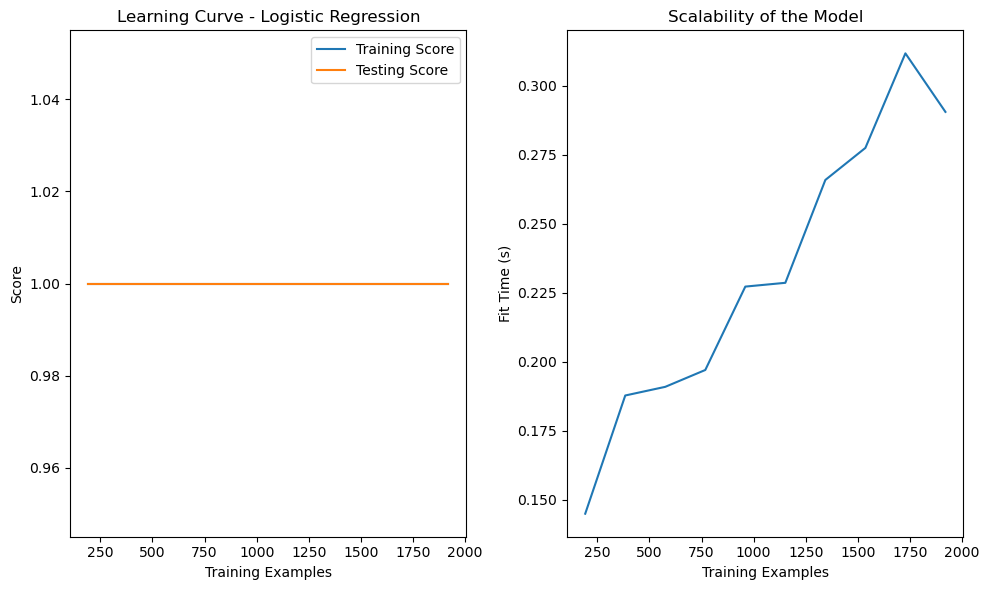

In [75]:
# Plotting learning curve untuk model Logistic Regression
plot_learning_curve(modelLogistic, X_train, y_train, 'Logistic Regression')

### Lasso Comparison

In [76]:
# ROC AUC Score untuk model Lasso Regression pada data uji
roc_auc_lasso = roc_auc_score(y_test, lasso_model.predict(X_test))
print("ROC AUC Score - Lasso Regression:", roc_auc_lasso)

ROC AUC Score - Lasso Regression: 0.9195162472590418


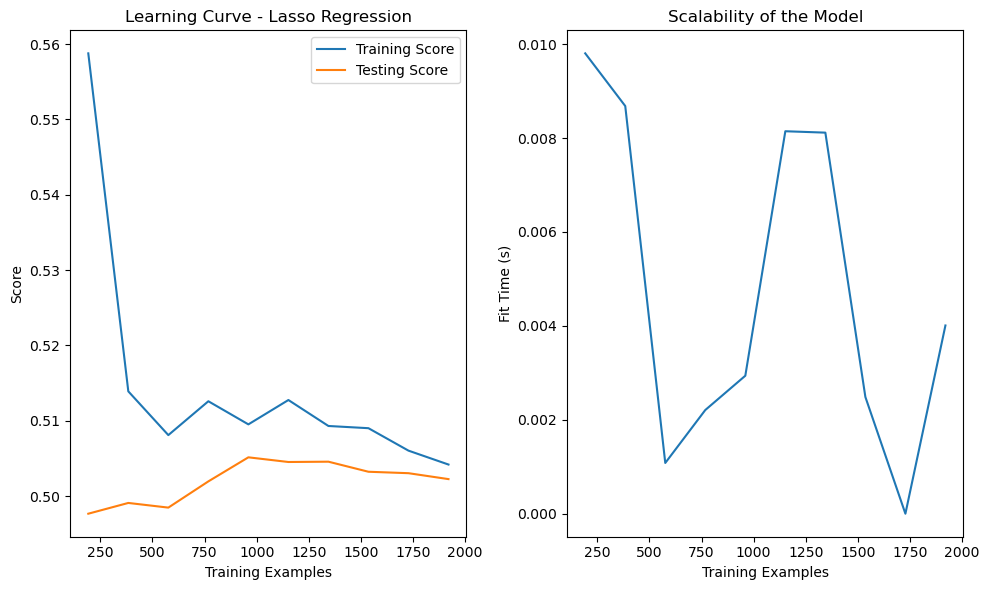

In [77]:
# Plotting learning curve untuk model Lasso Regression
plot_learning_curve(lasso_model, X_train, y_train, 'Lasso Regression')

## Ridge Comparison

In [78]:
# ROC AUC Score untuk model Ridge Regression pada data uji
roc_auc_ridge = roc_auc_score(y_test, model_ridge.predict(X_test))
print("ROC AUC Score - Ridge Regression:", roc_auc_ridge)

ROC AUC Score - Ridge Regression: 0.9980869948470767


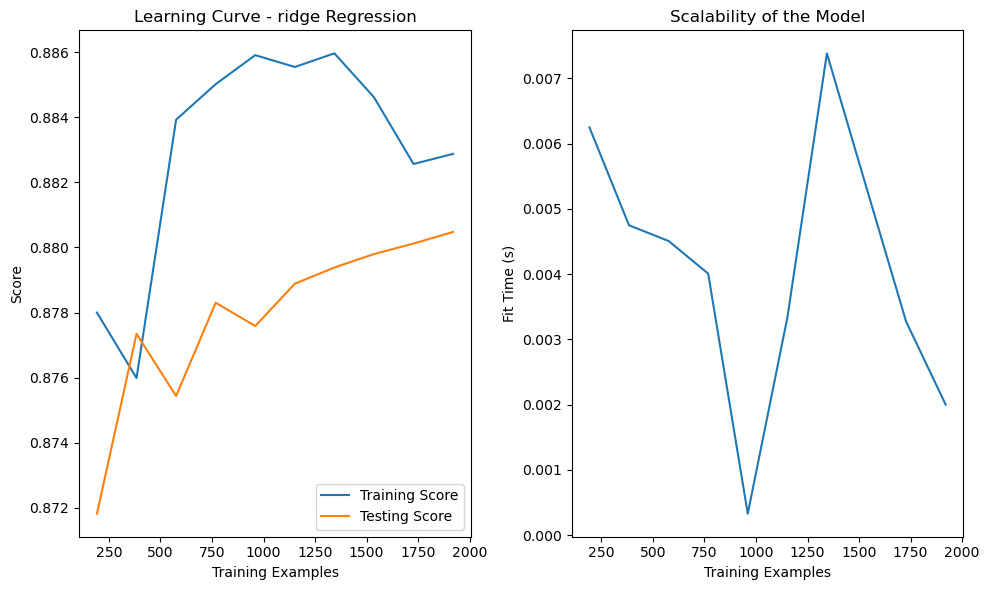

In [79]:
# Plotting learning curve untuk model Ridge Regression
plot_learning_curve(model_ridge, X_train, y_train, 'ridge Regression')

---

## Pengambilan Data Dari Bawah

---

In [80]:
desired_counts = {'1': 523, '0': 523}

# Inisialisasi DataFrame kosong
df_measured = pd.DataFrame()

# Loop through each class and select the desired count from the top
for class_value, count in desired_counts.items():
    # Filter the original DataFrame for the specific class
    class_df = df_no_outliers[df_no_outliers['HeartDisease'] == int(class_value)]
    
    # Take the top 'count' samples
    sampled_data = class_df.tail(count)
    
    # Menambahkan data sampel ke DataFrame baru
    df_measured = pd.concat([df_measured, sampled_data])

# Mengacak DataFrame untuk mencampur kelas
df_measured = df_measured.sample(frac=1, random_state=42).reset_index(drop=True)

In [81]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df_measured['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
0    523
1    523
Name: count, dtype: int64


In [82]:
# Health-related Features
health_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Lifestyle and Behavior
lifestyle_features = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']

# Medical Tests and Indicators
medical_tests = ['Stroke', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# Demographic and Personal Information
demographic_info = ['Sex', 'Race', 'Age']

# Functional Abilities
functional_abilities = ['DiffWalking']


In [83]:
feature_cols = demographic_info + lifestyle_features + medical_tests

In [84]:
# Membagi dataset menjadi data latih dan data uji

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_measured['age_group_encoded'] = encoder.fit_transform(df_measured['age_group'])

X = df_measured[feature_cols]
y = df_measured['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL EVALUATION

## Logistic Regression

### Table Sampling

In [85]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

    Train Size    Test Size Total Samples  Accuracy
0  836 (79.9%)  210 (20.1%)          1046  0.985714
1  732 (70.0%)  314 (30.0%)          1046  0.961783
2  627 (59.9%)  419 (40.1%)          1046  0.973747


### Model

In [86]:
noise_level = 0.25

In [87]:
num_samples = len(y_train)
num_samples_to_flip = int(noise_level * num_samples)
flip_indices = np.random.choice(num_samples, num_samples_to_flip, replace=False)
flip_indices = np.where(flip_indices < len(y_train), flip_indices, flip_indices % len(y_train))

In [88]:
y_train_noisy = y_train.copy()
y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 2, 10, 100],
    'penalty': ['l1', 'l2']
}

In [91]:
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(X_train, y_train_noisy)

LogisticRegression(max_iter=1000)

In [92]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=50)

In [93]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [94]:
grid_search_logistic = GridSearchCV(modelLogistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 2, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [95]:
best_model = grid_search_logistic.best_estimator_

In [96]:
y_pred = best_model.predict(X_test)

In [97]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Akurasi model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriks konfusi yang menunjukkan hasil prediksi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9116945107398569
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       229
           1       0.84      1.00      0.91       190

    accuracy                           0.91       419
   macro avg       0.92      0.92      0.91       419
weighted avg       0.93      0.91      0.91       419

Confusion Matrix:
 [[192  37]
 [  0 190]]


In [98]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                            
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0883054892601432
R-squared: 0.6436911054929901
Mean Absolute Error: 0.0883054892601432


In [99]:
from sklearn.metrics import roc_auc_score

# Memprediksi probabilitas untuk kelas positif pada training set
y_train_prob = modelLogistic.predict_proba(X_train)[:, 1]

# Memprediksi probabilitas untuk kelas positif pada testing set
y_test_prob = modelLogistic.predict_proba(X_test)[:, 1]

# Hitung AUC untuk set pelatihan
auc_train = roc_auc_score(y_train, y_train_prob)

# Hitung AUC untuk set pengujian
auc_test = roc_auc_score(y_test, y_test_prob)

# Mencetak skor AUC
print("AUC for Training Set:", auc_train)
print("AUC for Testing Set:", auc_test)


AUC for Training Set: 0.9999693571122142
AUC for Testing Set: 1.0


## Lasso Regression

### Table Sampling

In [100]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Lasso(max_iter=1000)  # Using Lasso Regression
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    # Convert predicted values to binary predictions (0 or 1)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

    Train Size    Test Size Total Samples  Accuracy
0  836 (79.9%)  210 (20.1%)          1046  0.785714
1  732 (70.0%)  314 (30.0%)          1046  0.821656
2  627 (59.9%)  419 (40.1%)          1046  0.813842


### Model

In [101]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [102]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [103]:
# Inisialisasi model Lasso dengan alpha (parameter regularisasi)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train_noisy)

Lasso()

In [104]:
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lasso.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [105]:
best_model_lasso = grid_search_lasso.best_estimator_

In [106]:
# Prediksi nilai target pada data uji
y_pred_lasso = best_model_lasso.predict(X_test)

# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_lasso_binary = (y_pred_lasso > 0.5).astype(int)

In [107]:
# Evaluasi model Lasso
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
print("Lasso Regression Accuracy:", accuracy_lasso)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Lasso Model:\n", classification_report(y_test, y_pred_lasso_binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Lasso Model:\n", confusion_matrix(y_test, y_pred_lasso_binary))

Lasso Regression Accuracy: 0.9976133651551312
Classification Report - Lasso Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       190

    accuracy                           1.00       419
   macro avg       1.00      1.00      1.00       419
weighted avg       1.00      1.00      1.00       419

Confusion Matrix - Lasso Model:
 [[228   1]
 [  0 190]]


In [108]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                         
mse = mean_squared_error(y_test, y_pred_lasso_binary)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_lasso_binary)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_lasso_binary)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.002386634844868735
R-squared: 0.9903700298781889
Mean Absolute Error: 0.002386634844868735


In [109]:
# AUC for Lasso model

# Prediksi probabilitas pada data latih dan uji
y_train_prob_lasso = lasso_model.predict(X_train)
y_test_prob_lasso = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_lasso = roc_auc_score(y_train, y_train_prob_lasso)
auc_test_lasso = roc_auc_score(y_test, y_test_prob_lasso)

# Menampilkan AUC scores
print("AUC for Training Set - Lasso Model:", auc_train_lasso)
print("AUC for Testing Set - Lasso Model:", auc_test_lasso)

AUC for Training Set - Lasso Model: 0.900655757798615
AUC for Testing Set - Lasso Model: 0.8569064582854516


## Ridge Regression

### Table Sampling

In [110]:
from sklearn.linear_model import Ridge

results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Ridge(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


    Train Size    Test Size Total Samples  Accuracy
0  836 (79.9%)  210 (20.1%)          1046  0.914286
1  732 (70.0%)  314 (30.0%)          1046  0.926752
2  627 (59.9%)  419 (40.1%)          1046  0.971360


### Model

In [111]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [112]:
# Inisialisasi model Ridge dengan alpha (parameter regularisasi)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Buat dan sesuaikan model Ridge dengan alpha (parameter regularisasi)
model_ridge = Ridge(alpha=1.0)  
model_ridge.fit(X_train, y_train_noisy)

Ridge()

In [113]:
grid_search_ridge = GridSearchCV(model_ridge, param_grid_ridge, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_ridge.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [114]:
best_model_ridge = grid_search_ridge.best_estimator_

In [115]:
# Prediksi nilai target pada data uji menggunakan model Ridge
y_pred_ridge = best_model_ridge.predict(X_test)

In [116]:
# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_Ridge_Binary = (y_pred_ridge > 0.5).astype(int)

In [117]:
# Evaluasi model Ridge
accuracy_binary = accuracy_score(y_test, y_pred_Ridge_Binary)
print("Ridge Regression Accuracy:", accuracy_binary)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Ridge Model:\n", classification_report(y_test, y_pred_Ridge_Binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Ridge Model:\n", confusion_matrix(y_test, y_pred_Ridge_Binary))

Ridge Regression Accuracy: 0.9976133651551312
Classification Report - Ridge Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       190

    accuracy                           1.00       419
   macro avg       1.00      1.00      1.00       419
weighted avg       1.00      1.00      1.00       419

Confusion Matrix - Ridge Model:
 [[228   1]
 [  0 190]]


In [118]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                                    
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.040720978633500375
R-squared: 0.8356925826275348
Mean Absolute Error: 0.1445116188691646


In [119]:
# AUC (Area Under the Curve) untuk model Ridge
# Prediksi probabilitas pada data latih dan uji
y_train_prob_ridge = lasso_model.predict(X_train)
y_test_prob_ridge = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_ridge = roc_auc_score(y_train, y_train_prob_ridge)
auc_test_ridge = roc_auc_score(y_test, y_test_prob_ridge)

# Menampilkan AUC scores
print("AUC for Training Set - ridge Model:", auc_train_ridge)
print("AUC for Testing Set - ridge Model:", auc_test_ridge)

AUC for Training Set - ridge Model: 0.900655757798615
AUC for Testing Set - ridge Model: 0.8569064582854516


# Model Comparison:

In [120]:
# Fungsi untuk plotting learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Testing Score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, fit_times_mean)
    plt.title('Scalability of the Model')
    plt.xlabel('Training Examples')
    plt.ylabel('Fit Time (s)')

    plt.tight_layout()
    plt.show()

### Logistic Comparison

In [121]:
# Prediksi probabilitas kelas positif pada data latih
y_train_prob_logistic = modelLogistic.predict_proba(X_train)[:, 1]

# ROC AUC Score pada data latih
roc_auc_train = roc_auc_score(y_train, y_train_prob_logistic)

In [122]:
# ROC AUC Score pada data uji
roc_auc_logistic = roc_auc_score(y_test, modelLogistic.predict_proba(X_test)[:, 1])
print("ROC AUC Score - Logistic Regression:", roc_auc_logistic)

ROC AUC Score - Logistic Regression: 1.0


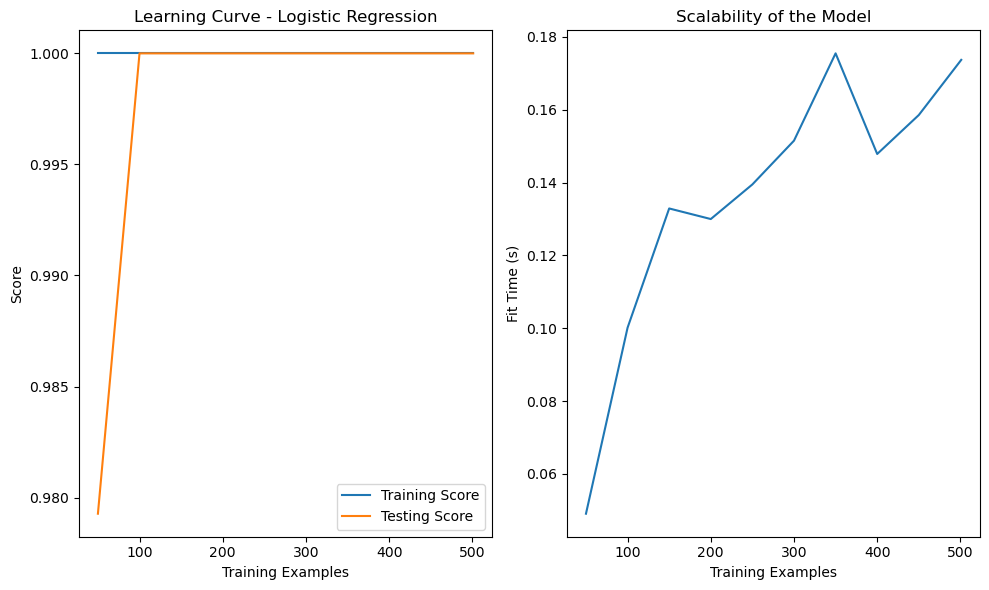

In [123]:
# Plotting learning curve untuk model Logistic Regression
plot_learning_curve(modelLogistic, X_train, y_train, 'Logistic Regression')

### Lasso Comparison

In [124]:
# ROC AUC Score untuk model Lasso Regression pada data uji
roc_auc_lasso = roc_auc_score(y_test, lasso_model.predict(X_test))
print("ROC AUC Score - Lasso Regression:", roc_auc_lasso)

ROC AUC Score - Lasso Regression: 0.8569064582854516


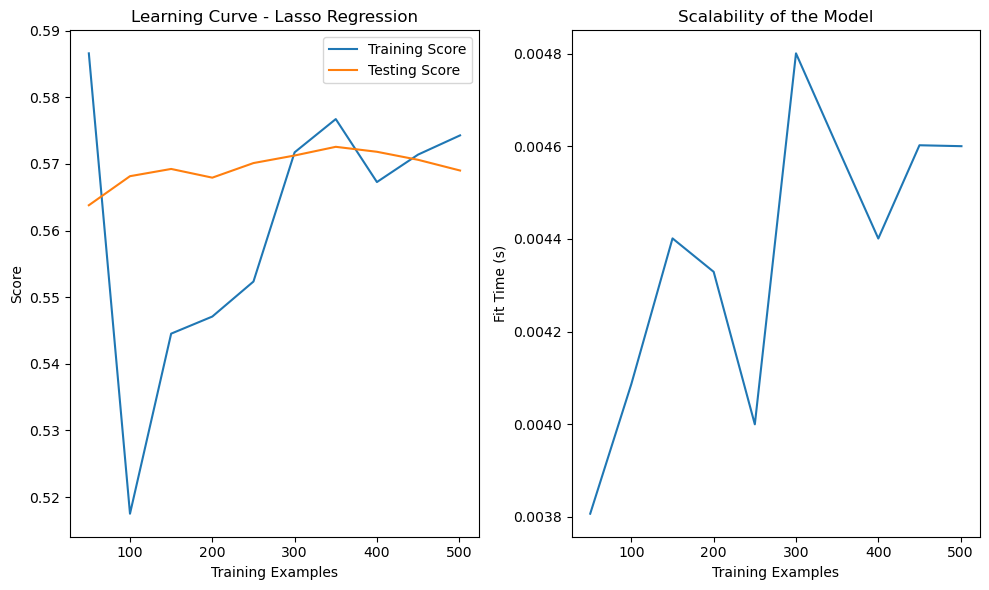

In [125]:
# Plotting learning curve untuk model Lasso Regression
plot_learning_curve(lasso_model, X_train, y_train, 'Lasso Regression')

## Ridge Comparison

In [126]:
# ROC AUC Score untuk model Ridge Regression pada data uji
roc_auc_ridge = roc_auc_score(y_test, model_ridge.predict(X_test))
print("ROC AUC Score - Ridge Regression:", roc_auc_ridge)

ROC AUC Score - Ridge Regression: 1.0


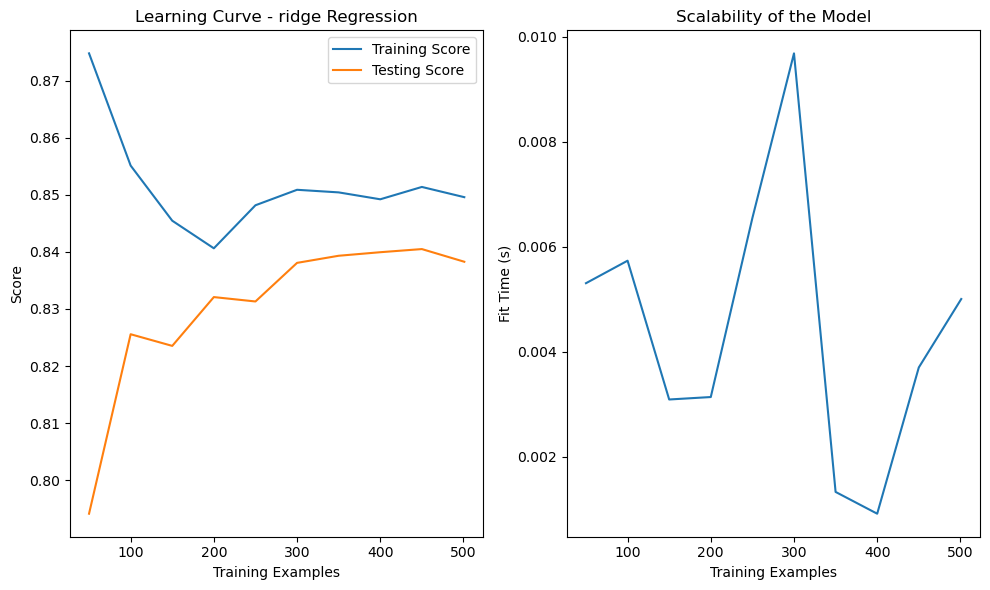

In [127]:
# Plotting learning curve untuk model Ridge Regression
plot_learning_curve(model_ridge, X_train, y_train, 'ridge Regression')